In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
#importing the data
data=pd.read_csv("Train.csv")

In [3]:
data.head(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
data.tail(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0

# Data Preparation

In [5]:
data.shape

(10999, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
#ceckning for missing or null entries
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Handling Categorical Values

In [8]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
#checking forr categorical columns
categorical_attributes = []
numerical_attributes = []

for col in data.columns[1:-1]:
    if data[col].dtype == 'object':
        categorical_attributes.append(col)
    else:
        numerical_attributes.append(col)
print(f"Categorical attributes are: {categorical_attributes}\nNumerical attributes are: {numerical_attributes}")

Categorical attributes are: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Numerical attributes are: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [10]:
#Label encoding for categorical attributes
for col in categorical_attributes:
    data[col] = data[col].astype('category').cat.codes

In [11]:
#checking the attributes after conversion
for col, dtype in data.dtypes.items():
    print(f"{col} - {dtype}")

ID - int64
Warehouse_block - int8
Mode_of_Shipment - int8
Customer_care_calls - int64
Customer_rating - int64
Cost_of_the_Product - int64
Prior_purchases - int64
Product_importance - int8
Gender - int8
Discount_offered - int64
Weight_in_gms - int64
Reached.on.Time_Y.N - int64


In [12]:
data.head()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0                44           1233                    1  
1       1                59           3088                    1  
2       1                48           3374                    1  
3       1                10           1177                    1  
4       0                46           2484                    1

## Handling outliers in Data

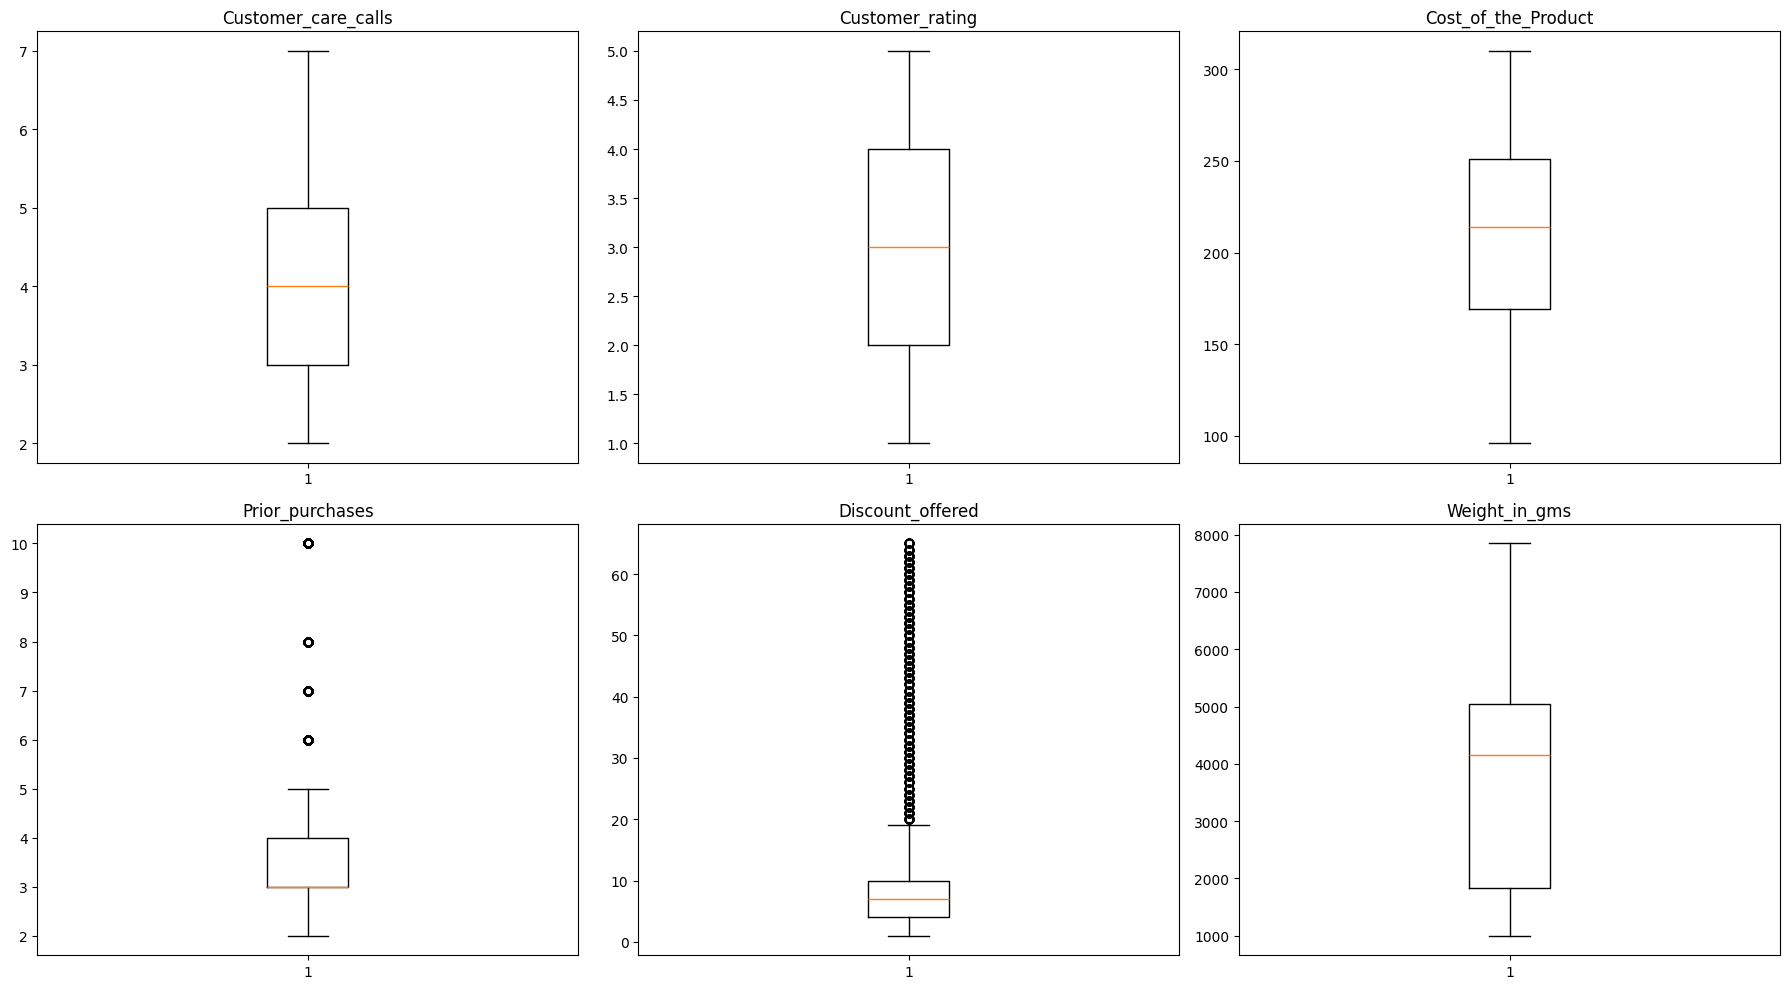

In [13]:
#visualizing using box plot for finding outliers in each numeriacl attribute before conversion
c = 0
plt.figure(figsize=(18, 10))
for i in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID']).columns:
    if data[i].dtype != 'object':
        plt.subplot(2, 3, c + 1)
        plt.boxplot(data[i])
        plt.title(i)
        c += 1

plt.tight_layout()
plt.show()

In [14]:
#outliers detection using quartiles
def check_outliers(arr):
    Q1= np.percentile(arr,25,method= 'midpoint')
    Q3= np.percentile(arr,75,method= 'midpoint')
    IQR=Q3 - Q1
    
    #above the upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(arr>=upper)
    print(' '*3,len(upper_array[upper_array == True]),'are over the upper bound:',upper)

    #below Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(arr<=lower)
    print(' '*3,len(lower_array[lower_array == True]),'are less than the lower bound:',lower,'\n')

for i in data.drop(columns=[
                            'Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N','ID'
                           ]).columns:
    if data[i].dtype !='object':
        print(i)
        check_outliers(data[i])

Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0 

Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0 

Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0 

Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5 

Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0 

Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25 



In [15]:
#function to remove outliers using quartiles
def remove_outliers(arr):     
    Q1= np.percentile(arr,25,method= 'midpoint')
    Q3= np.percentile(arr,75,method= 'midpoint')
    IQR=Q3 - Q1

    upper=Q3+1.5*IQR #upperbound
    lower=Q1-1.5*IQR #lowerbound
    #filtering or removing outliers
    return arr[(arr >= lower) & (arr <= upper)]

#removing outliers for each numerical attribute
for col in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID']).columns:
    if data[col].dtype != 'object':
        data[col] = remove_outliers(data[col])

In [19]:
#null values are created as we removed the null values
data.isnull().sum()

ID                        0
Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls       0
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases        1003
Product_importance        0
Gender                    0
Discount_offered       2209
Weight_in_gms             0
Reached.on.Time_Y.N       0
dtype: int64

In [20]:
#function to fill values in the removed attribute values or at the place of outliers
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype != 'object':  # Only for numerical columns
            df[col]=df[col].fillna(df[col].median())

#fill NaN's with median
fill_missing_values(data)

In [21]:
data.head()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177              3.0                   1   
1                5                  216              2.0                   1   
2                2                  183              4.0                   1   
3                3                  176              4.0                   2   
4                2                  184              3.0                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0               6.0           1233                    1  
1       1               6.0           3088                    1  
2       1               6.0           3374                    1  
3       1              10.0           1177                    1  
4       0               6.0           2484                    1

# Exploratory Data Analysis

## Descriptive Statistics

In [23]:
data.describe(include='all')

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
count  10999.00000     10999.000000      10999.000000         10999.000000   
mean    5500.00000         2.333394          1.516865             4.054459   
std     3175.28214         1.490726          0.756894             1.141490   
min        1.00000         0.000000          0.000000             2.000000   
25%     2750.50000         1.000000          1.000000             3.000000   
50%     5500.00000         3.000000          2.000000             4.000000   
75%     8249.50000         4.000000          2.000000             5.000000   
max    10999.00000         4.000000          2.000000             7.000000   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
count     10999.000000         10999.000000     10999.000000   
mean          2.990545           210.196836         3.193654   
std           1.413603            48.063272         0.928892   
min           1.000000            96.000000         2.000000   
25%           2.000000           169.000000         3.000000   
50%           3.000000           214.000000         3.000000   
75%           4.000000           251.000000         4.000000   
max           5.000000           310.000000         5.000000   

       Product_importance        Gender  Discount_offered  Weight_in_gms  \
count        10999.000000  10999.000000      10999.000000   10999.000000   
mean             1.346031      0.495863          5.980089    3634.016729   
std              0.631434      0.500006          3.150159    1635.377251   
min              0.000000      0.000000          1.000000    1001.000000   
25%              1.000000      0.000000          4.000000    1839.500000   
50%              1.000000      0.000000          6.000000    4149.000000   
75%              2.000000      1.000000          8.000000    5050.000000   
max              2.000000      1.000000         19.000000    7846.000000   

       Reached.on.Time_Y.N  
count         10999.000000  
mean              0.596691  
std               0.490584  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

## visual Analysis

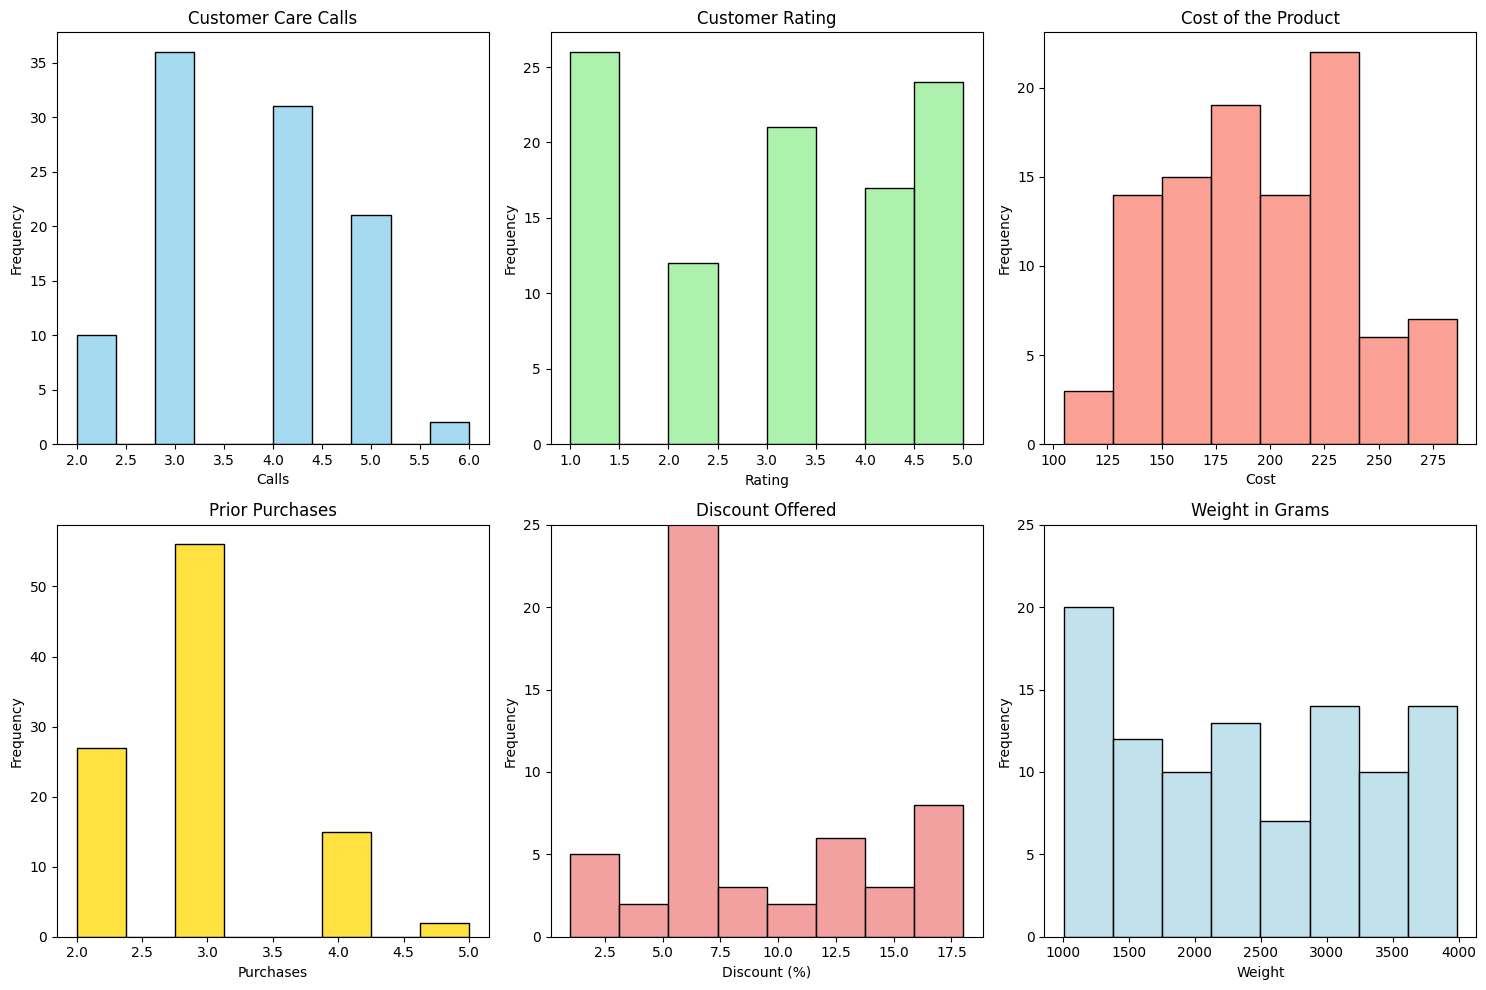

In [24]:
#attributes to plot
attributes_to_plot = [
    'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
    'Prior_purchases', 'Discount_offered', 'Weight_in_gms'
]

#limiting the number of entries to plot as we get clusiered plot
data1 = data.iloc[:100] if len(data) > 100 else data

#for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

#each attribute with specified characteristics for ploting
for i, attribute in enumerate(attributes_to_plot):
    ax = axes[i]
    
    if attribute == 'Customer_care_calls':
        sns.histplot(data1[attribute], kde=False, color='skyblue', ax=ax)
        ax.set_title('Customer Care Calls')
        ax.set_xlabel('Calls')
                
    elif attribute == 'Customer_rating':
        sns.histplot(data1[attribute], kde=False, color='lightgreen', ax=ax)
        ax.set_title('Customer Rating')
        ax.set_xlabel('Rating')
        
    elif attribute == 'Cost_of_the_Product':
        sns.histplot(data1[attribute], kde=False, color='salmon', ax=ax)
        ax.set_title('Cost of the Product')
        ax.set_xlabel('Cost')
        
    elif attribute == 'Prior_purchases':
        sns.histplot(data1[attribute], kde=False, color='gold', ax=ax)
        ax.set_title('Prior Purchases')
        ax.set_xlabel('Purchases')
        
    elif attribute == 'Discount_offered':
        sns.histplot(data1[attribute], kde=False, color='lightcoral', ax=ax)
        ax.set_title('Discount Offered')
        ax.set_xlabel('Discount (%)')
        ax.set_ylim(0, 25)  # Adjusting y-axis limit for visibility
        
    elif attribute == 'Weight_in_gms':
        sns.histplot(data1[attribute], kde=False, color='lightblue', ax=ax)
        ax.set_title('Weight in Grams')
        ax.set_xlabel('Weight')
        ax.set_ylim(0, 25)  # Adjusting y-axis limit for visibility
        
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### for categorical values

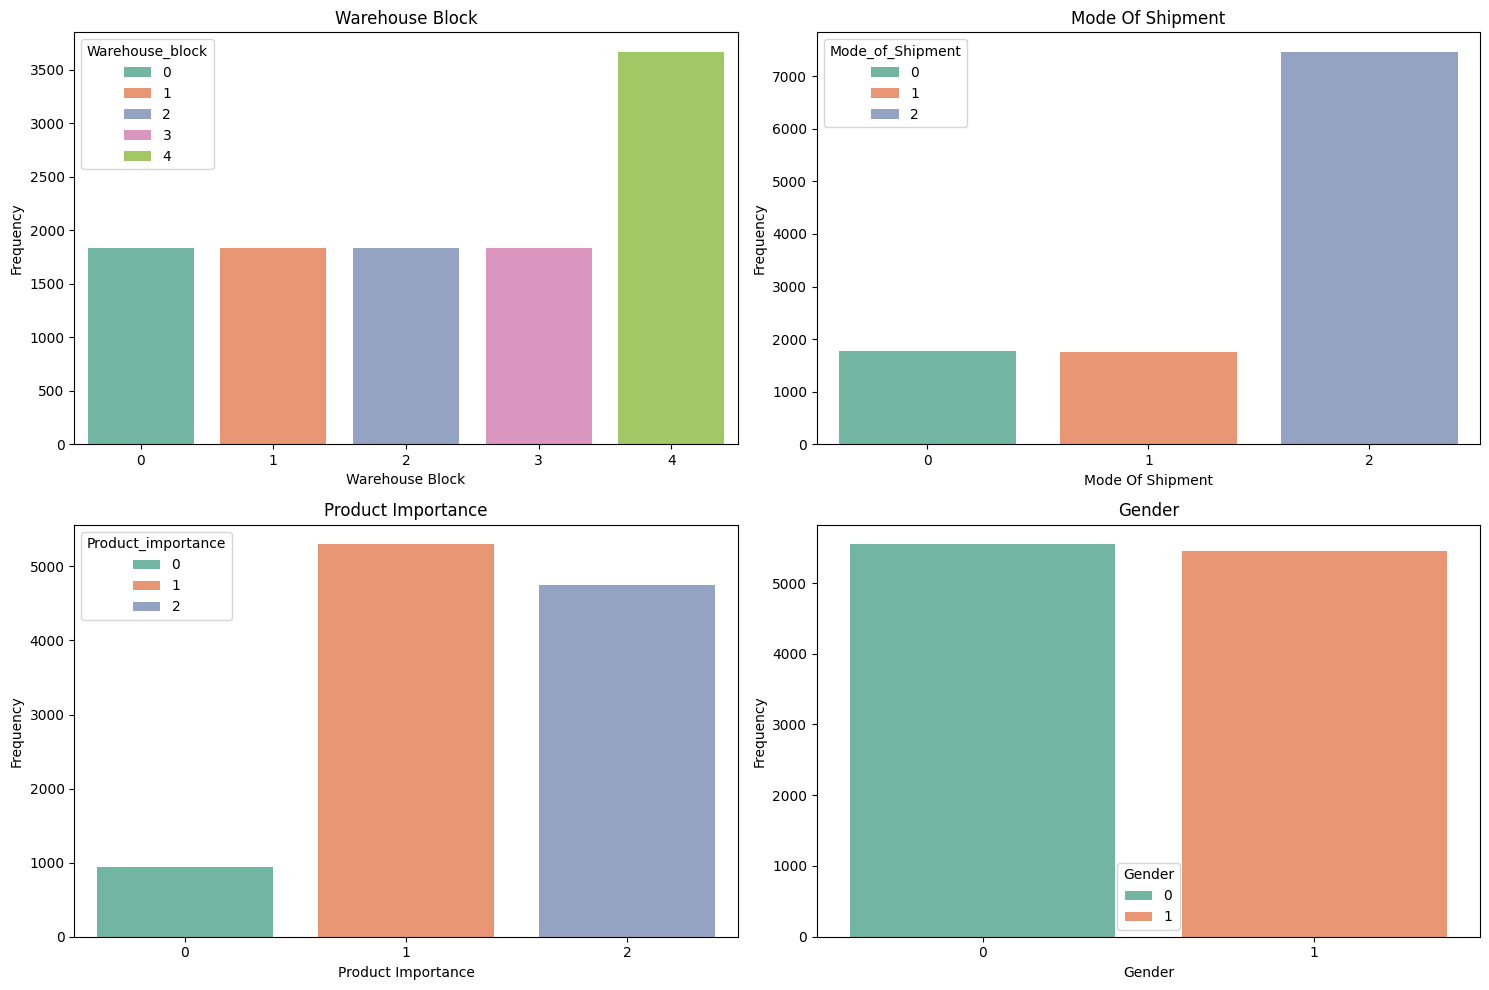

In [25]:
categorical_attributes = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

#subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

#plot for each attribute with specified characteristics
for i, attribute in enumerate(categorical_attributes):
    ax = axes[i]
    sns.countplot(x=attribute, data=data, palette="Set2",hue=attribute, ax=ax)
    ax.set_title(attribute.replace('_', ' ').title())
    ax.set_xlabel(attribute.replace('_', ' ').title())
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## Bivariate analysis

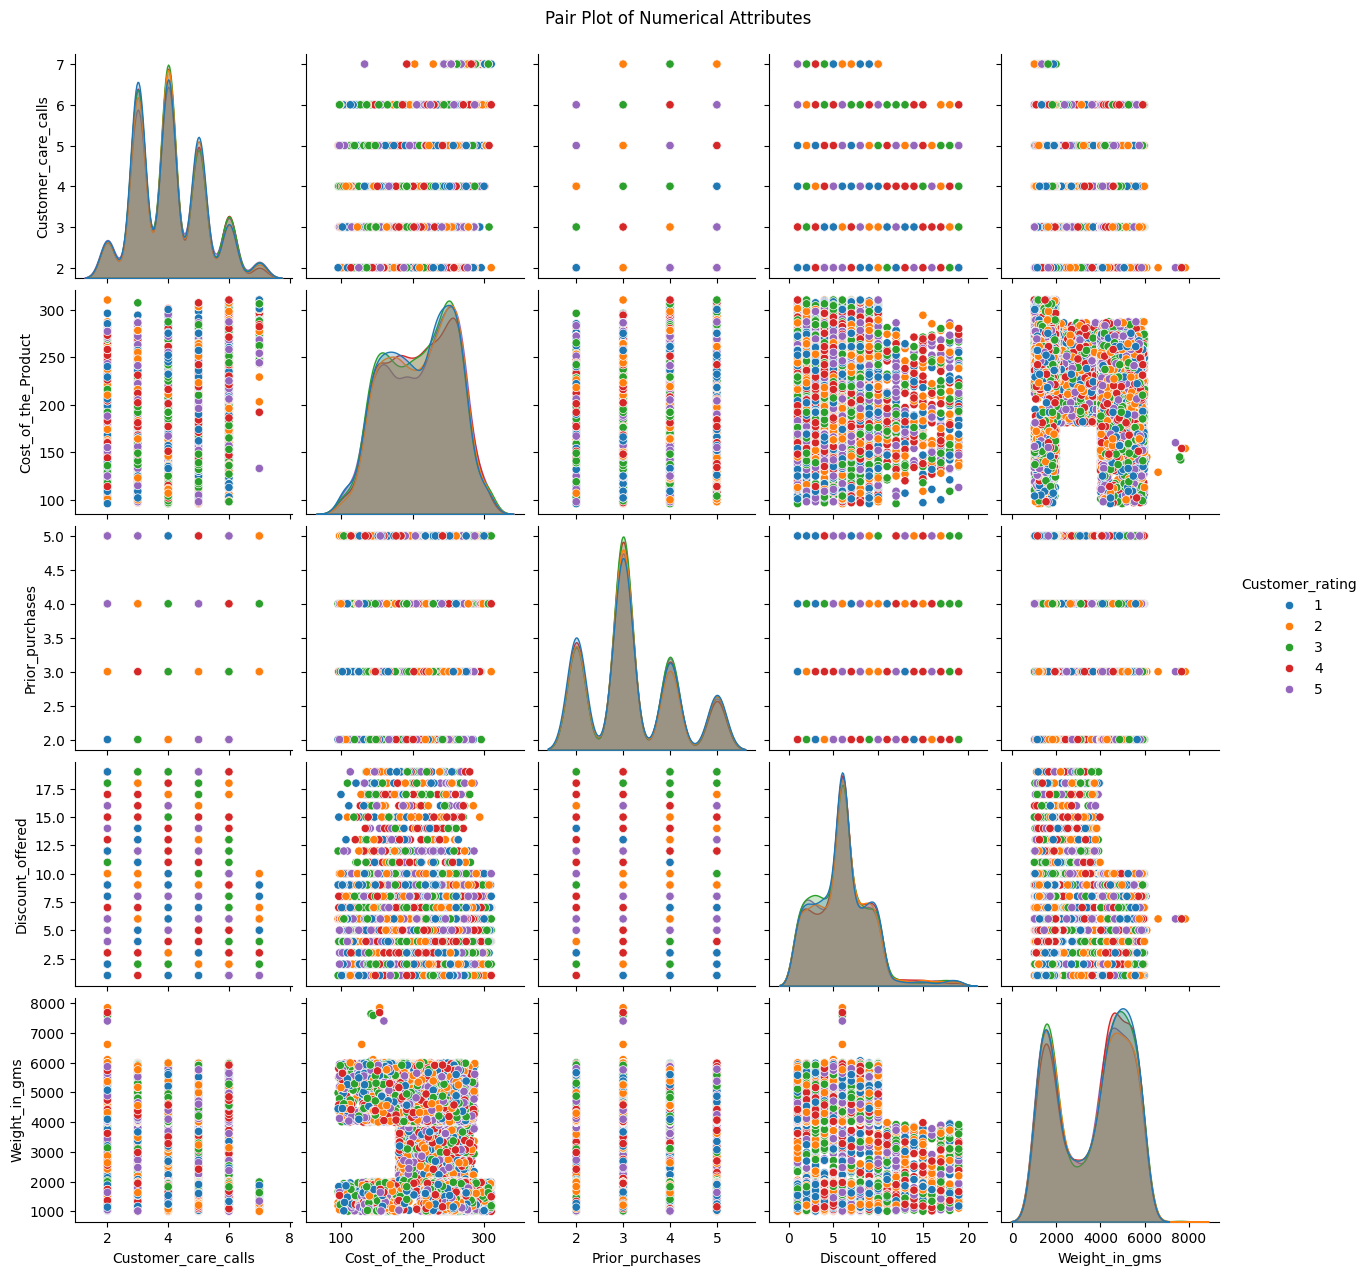

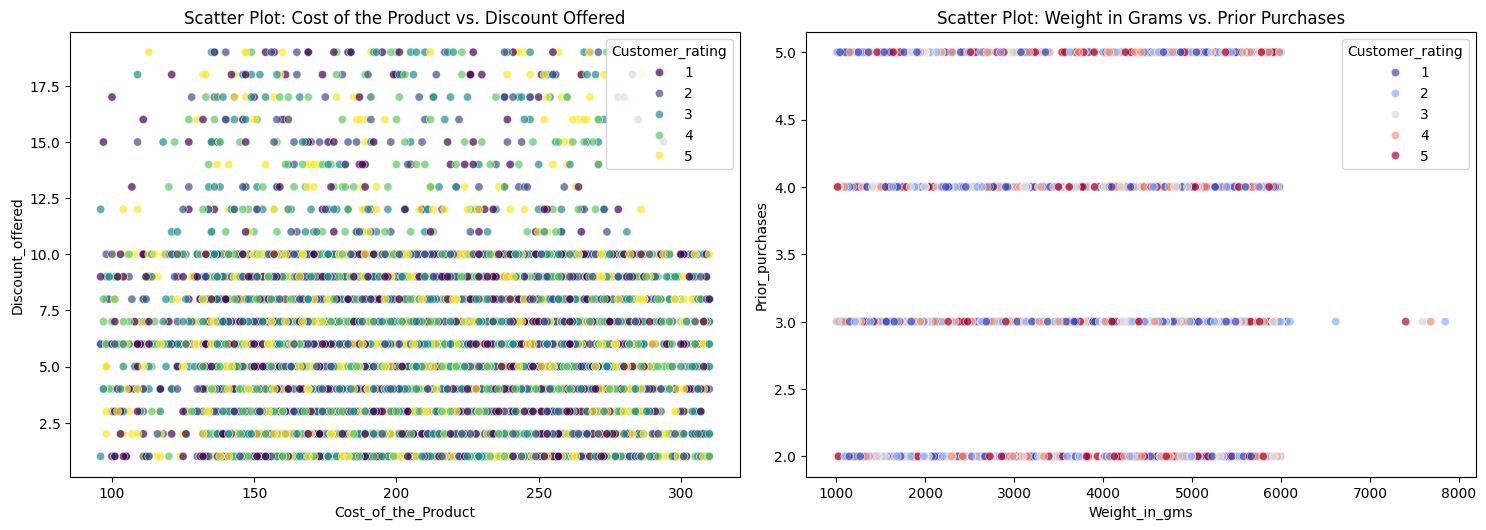

In [26]:
data_subset = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                    'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]

#scatter plot matrix(numerical attributes)
sns.pairplot(data_subset, hue='Customer_rating',palette='tab10')
plt.suptitle('Pair Plot of Numerical Attributes', y=1.02)
plt.show()

#scatter plots for individual pairs
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Cost_of_the_Product', y='Discount_offered', hue='Customer_rating', data=data, alpha=0.7, palette='viridis')
plt.title('Scatter Plot: Cost of the Product vs. Discount Offered')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Weight_in_gms', y='Prior_purchases', hue='Customer_rating', data=data, alpha=0.7, palette='coolwarm')
plt.title('Scatter Plot: Weight in Grams vs. Prior Purchases')

plt.tight_layout()
plt.show()


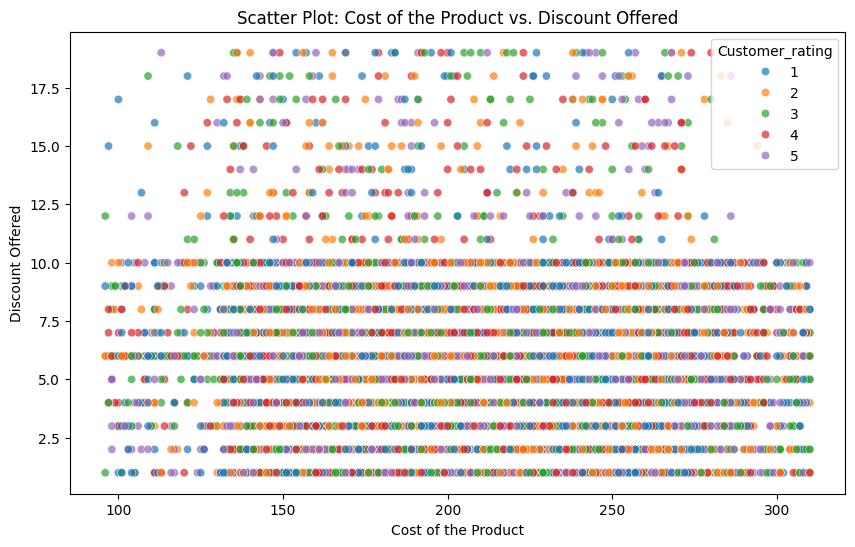

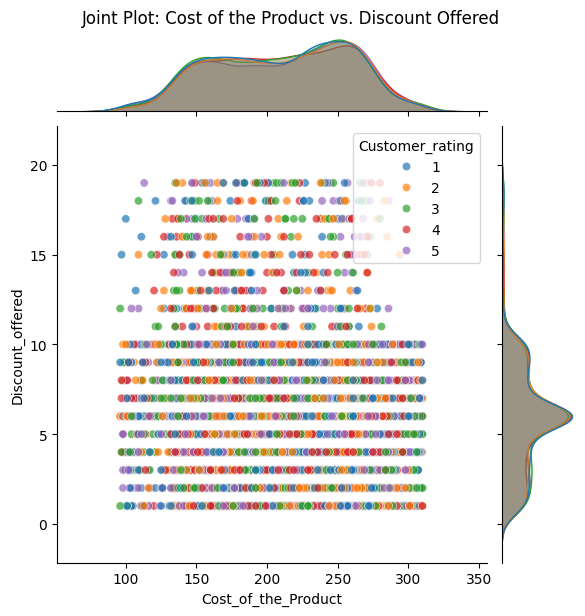

In [27]:
#graph-1
attribute1 = 'Cost_of_the_Product'
attribute2 = 'Discount_offered'

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=attribute1, y=attribute2, hue='Customer_rating', data=data, alpha=0.7, palette='tab10')
plt.title('Scatter Plot: Cost of the Product vs. Discount Offered')
plt.xlabel('Cost of the Product')
plt.ylabel('Discount Offered')
plt.show()

# Joint plot
sns.jointplot(x=attribute1, y=attribute2, data=data, kind='scatter',hue='Customer_rating', palette='tab10', alpha=0.7)
plt.suptitle('Joint Plot: Cost of the Product vs. Discount Offered', y=1.02)
plt.show()

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=attribute1, y=attribute2, data=data)
plt.title('Regression Plot: Cost of the Product vs. Discount Offered')
plt.xlabel('Cost of the Product')
plt.ylabel('Discount Offered')
plt.show()


## Multivariate analysis 

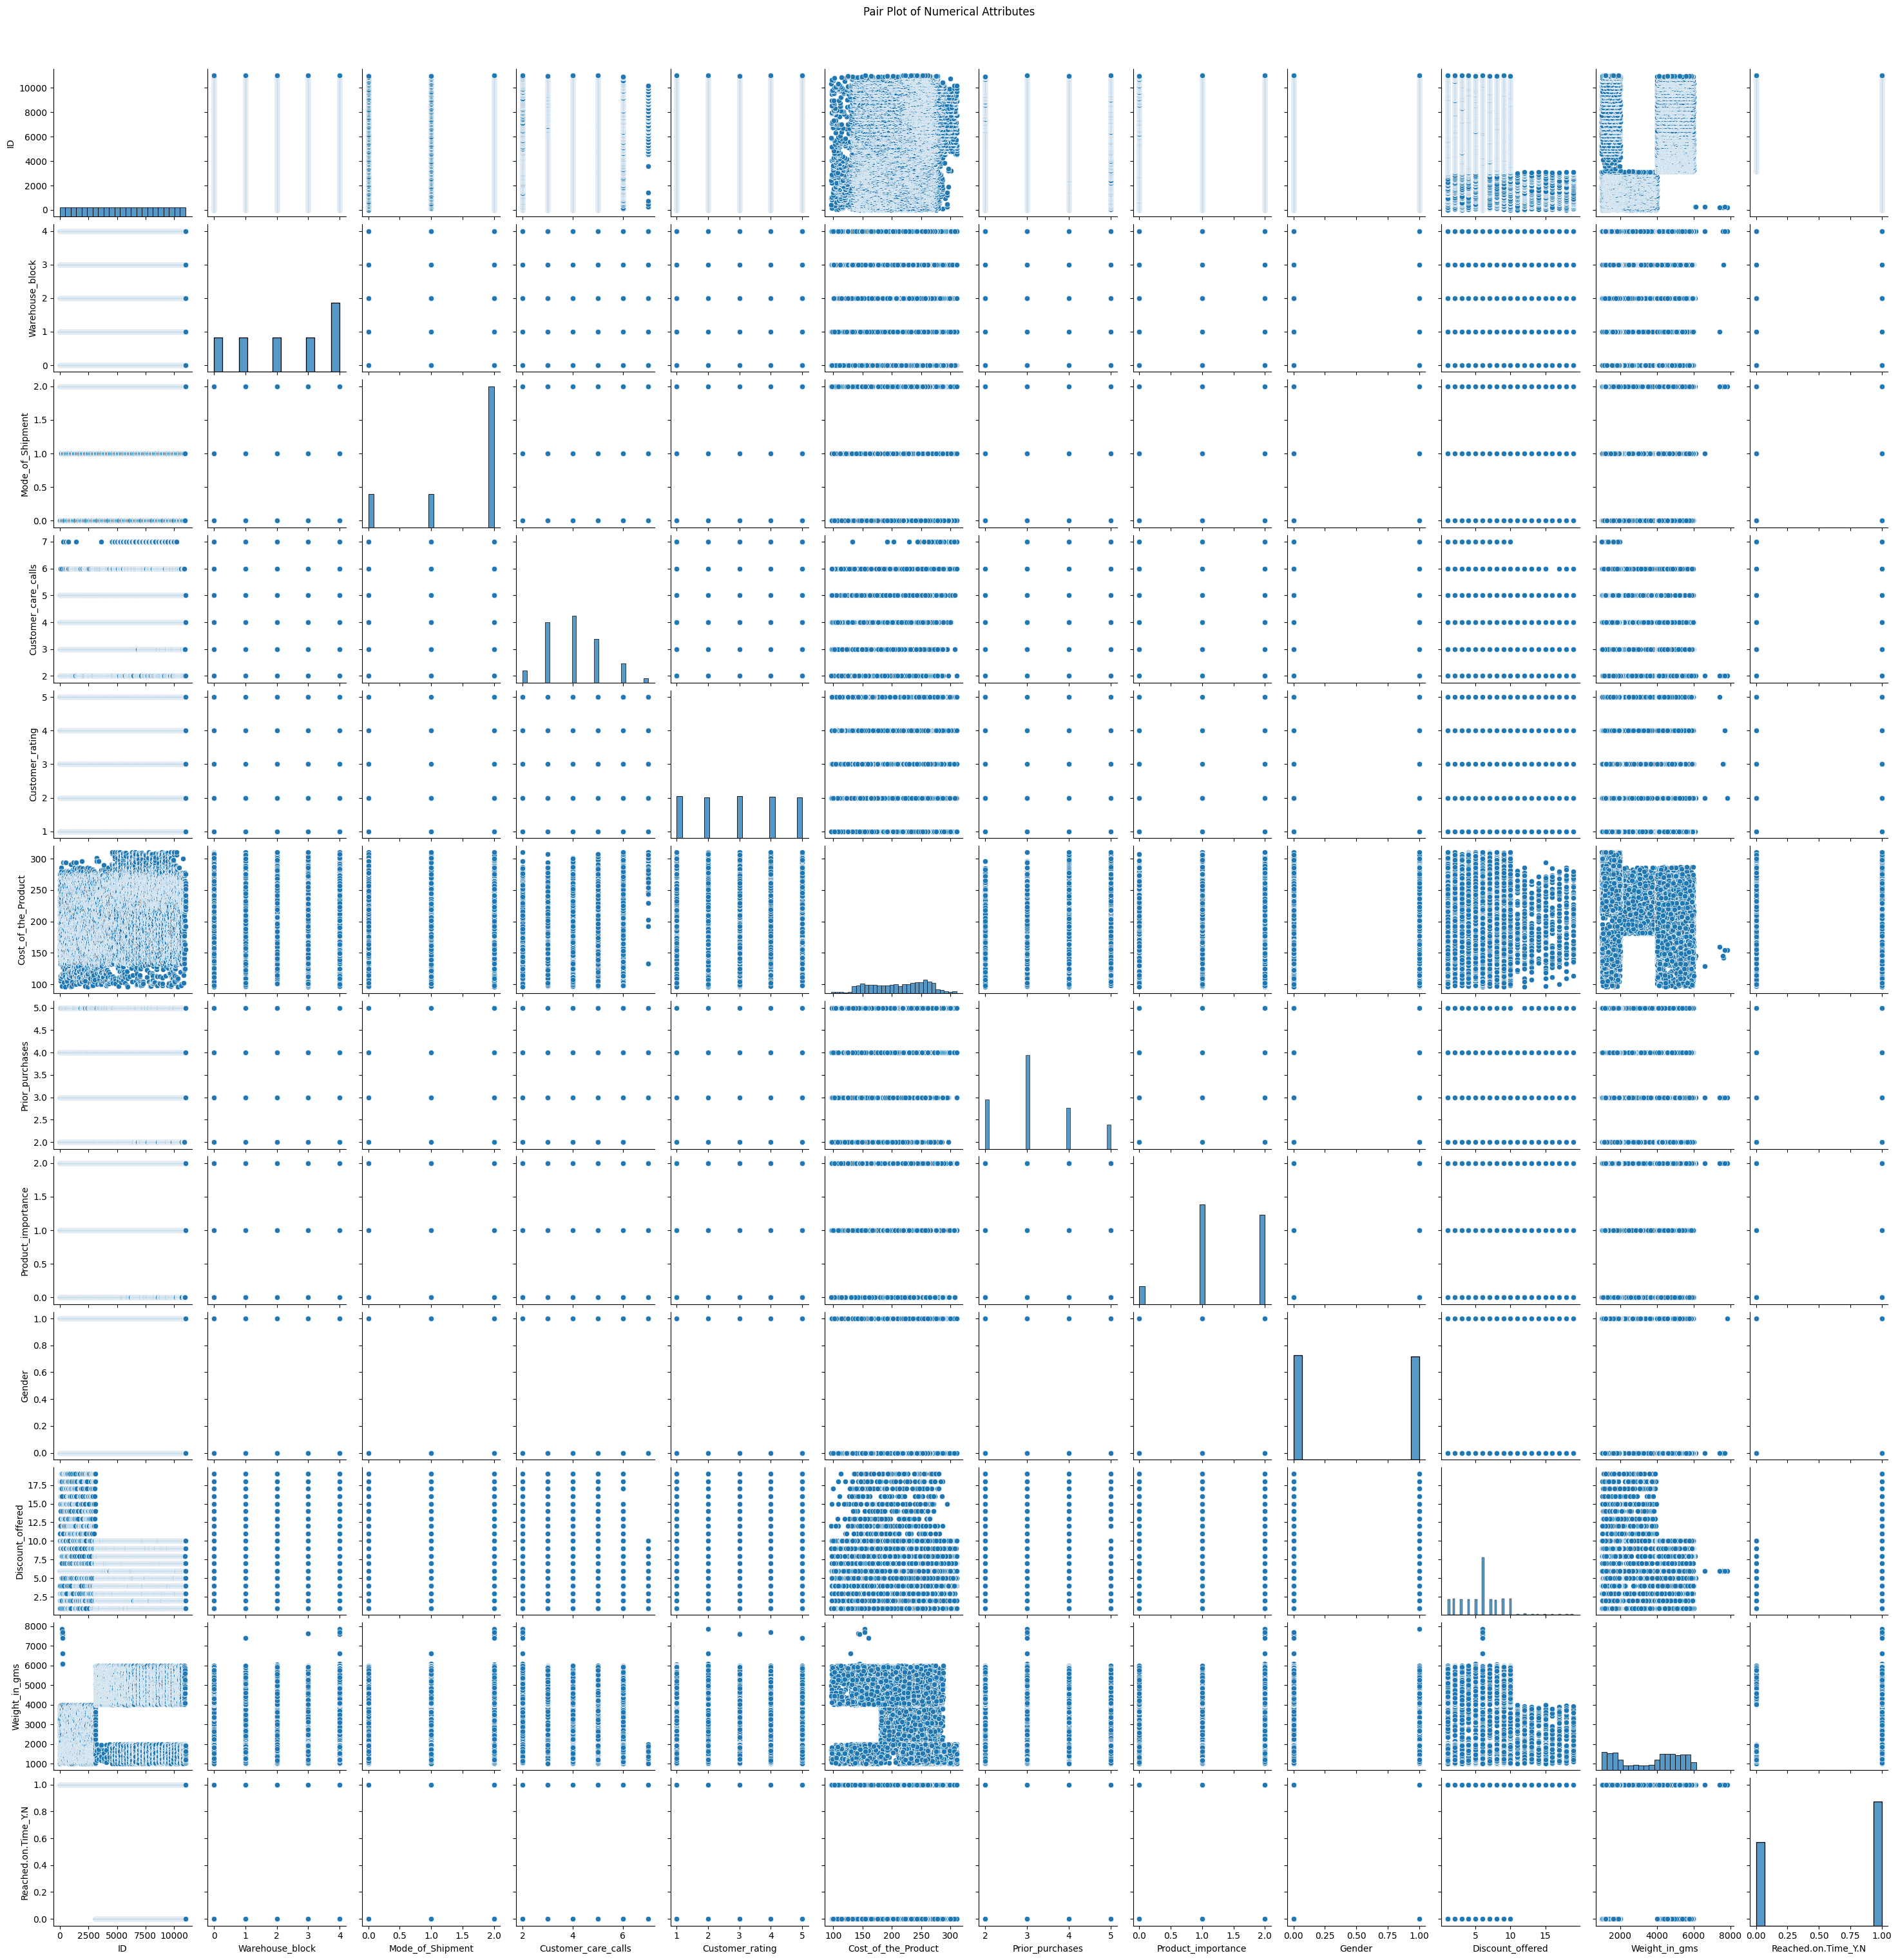

In [28]:
#pair plot for numerical attributes
sns.pairplot(data)
plt.suptitle('Pair Plot of Numerical Attributes', y=1.02)
plt.show()

In [29]:
#correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Attributes')
plt.show()

# Splitting data into train and test 

In [30]:
x=data.drop(columns=['ID','Reached.on.Time_Y.N'])
y=data['Reached.on.Time_Y.N']

In [31]:
x.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                3                 0                    4                2   
1                4                 0                    4                5   
2                0                 0                    2                2   
3                1                 0                    3                3   
4                2                 0                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177              3.0                   1       0   
1                  216              2.0                   1       1   
2                  183              4.0                   1       1   
3                  176              4.0                   2       1   
4                  184              3.0                   2       0   

   Discount_offered  Weight_in_gms  
0               6.0           1233  
1               6.0           3088  
2               6.0           3374  
3              10.0           1177  
4               6.0           2484

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

### Data scaling or data transformation

In [34]:
from sklearn.preprocessing import MinMaxScaler
norms=MinMaxScaler()
x=norms.fit_transform(x)
x

array([[0.75      , 0.        , 0.4       , ..., 0.        , 0.27777778,
        0.03389335],
       [1.        , 0.        , 0.4       , ..., 1.        , 0.27777778,
        0.30489408],
       [0.        , 0.        , 0.        , ..., 1.        , 0.27777778,
        0.34667641],
       ...,
       [0.5       , 1.        , 0.6       , ..., 0.        , 0.16666667,
        0.02249817],
       [1.        , 1.        , 0.6       , ..., 1.        , 0.05555556,
        0.03053324],
       [0.75      , 1.        , 0.        , ..., 0.        , 0.27777778,
        0.09320672]])

In [35]:
x.shape

(10999, 10)

In [36]:
#smote for handling data or class imbalence
from imblearn.over_sampling import SMOTE

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,shuffle=True)

#handling class imbalance
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9150, 10)
(3300, 10)
(9150,)
(3300,)


In [38]:
x_train

array([[0.25      , 1.        , 1.        , ..., 1.        , 0.27777778,
        0.11672754],
       [1.        , 0.        , 0.4       , ..., 0.        , 0.27777778,
        0.06866326],
       [0.5       , 1.        , 0.4       , ..., 0.        , 0.5       ,
        0.50343316],
       ...,
       [0.85536101, 1.        , 0.6       , ..., 0.        , 0.28650622,
        0.02281503],
       [0.49320625, 1.        , 0.205435  , ..., 0.        , 0.00150972,
        0.63202355],
       [0.73312171, 0.5       , 0.8       , ..., 1.        , 0.33708407,
        0.11296416]])

In [39]:
x_test

array([[1.        , 1.        , 0.4       , ..., 1.        , 0.27777778,
        0.15368882],
       [0.        , 0.5       , 0.2       , ..., 0.        , 0.27777778,
        0.66778671],
       [1.        , 0.        , 0.2       , ..., 0.        , 0.11111111,
        0.44426589],
       ...,
       [0.5       , 1.        , 0.2       , ..., 1.        , 0.27777778,
        0.45303141],
       [0.5       , 1.        , 0.4       , ..., 0.        , 0.27777778,
        0.32461651],
       [1.        , 0.        , 0.6       , ..., 0.        , 0.38888889,
        0.55748722]])

In [40]:
y_train.head()

0    0
1    1
2    0
3    1
4    0
Name: Reached.on.Time_Y.N, dtype: int64

In [41]:
y_test.head()

107     1
5594    1
6997    0
3984    0
3111    1
Name: Reached.on.Time_Y.N, dtype: int64

# Model building

## Training and testing the model in multiple algorithms

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold


In [43]:
#training models witchout without any hyperparameters
def models_eval_mm(x_train,y_train,x_test,y_test):
    
    #Logistic Regression
    lg = LogisticRegression()
    lg.fit(x_train,y_train)

    #Logistic Regression CV
    lcv = LogisticRegressionCV()
    lcv.fit(x_train,y_train)

    #XGBoost
    xgb = XGBClassifier()
    xgb.fit(x_train,y_train)

    #Ridge Classifier
    rg = RidgeClassifier()
    rg.fit(x_train,y_train)

    #KNN
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)

    #Random Forest
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)

    #SVM classifier
    svc = svm.SVC()
    svc.fit(x_train,y_train)

    return lg,lcv,xgb,rg,knn,rf,svc

lg,lcv,xgb,rg,knn,rf,svc = models_eval_mm(x_train,y_train,x_test,y_test)

### Testing the model

In [44]:
model_list = {
    'logistic regression':lg,
    'logistic regression CV':lcv,
    'XGBoost':xgb,
    'Ridge classifier':rg,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc
}

In [45]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
def eval(name,model):
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    print("Model : ",name)
    print("For Training data : -")
    print("Accuracy : {:.2f}".format(accuracy_score(y_train, y_train_pred) * 100))
    print("f1 score : {:.2f}".format(f1_score(y_train, y_train_pred) * 100))
    print("Recall score : {:.2f}".format(recall_score(y_train, y_train_pred) * 100))
    print("Precision score : {:.2f}".format(precision_score(y_train, y_train_pred) * 100))
    print("\nFor Test data : -")
    print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    print("f1 score : {:.2f}".format(f1_score(y_test, y_pred) * 100))
    print("Recall score : {:.2f}".format(recall_score(y_test, y_pred) * 100))
    print("Precision score : {:.2f}".format(precision_score(y_test, y_pred) * 100))
    print("-----------------------------")

In [46]:
for i in model_list.keys():
    eval(i,model_list[i])

Model :  logistic regression
For Training data : -
Accuracy : 64.48
f1 score : 62.86
Recall score : 60.11
Precision score : 65.87

For Test data : -
Accuracy : 62.94
f1 score : 66.37
Recall score : 60.71
Precision score : 73.20
-----------------------------
Model :  logistic regression CV
For Training data : -
Accuracy : 64.78
f1 score : 62.89
Recall score : 59.69
Precision score : 66.45

For Test data : -
Accuracy : 62.61
f1 score : 65.70
Recall score : 59.46
Precision score : 73.42
-----------------------------
Model :  XGBoost
For Training data : -
Accuracy : 92.38
f1 score : 92.04
Recall score : 88.11
Precision score : 96.34

For Test data : -
Accuracy : 66.24
f1 score : 69.51
Recall score : 63.88
Precision score : 76.23
-----------------------------
Model :  Ridge classifier
For Training data : -
Accuracy : 64.69
f1 score : 62.78
Recall score : 59.56
Precision score : 66.37

For Test data : -
Accuracy : 62.82
f1 score : 66.15
Recall score : 60.31
Precision score : 73.24
----------

In [47]:
#model evaluation report before hyperparameter tuinning
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
def eval(name,model):
    y_pred = model.predict(x_test)
    report =[]
    report.append(name)
    report.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(f1_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(recall_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(precision_score(y_test, y_pred) * 100))
    return report

evaluation_report = []
for i in model_list.keys():
    evaluation_report.append(eval(i,model_list[i]))
evaluation_report = pd.DataFrame(evaluation_report,columns=['Name','Accuracy','f1_score','Recall','Precision'])
evaluation_report.to_csv('model_eval_before.csv')
evaluation_report

Name Accuracy f1_score Recall Precision
0        logistic regression    62.94    66.37  60.71     73.20
1     logistic regression CV    62.61    65.70  59.46     73.42
2                    XGBoost    66.24    69.51  63.88     76.23
3           Ridge classifier    62.82    66.15  60.31     73.24
4                        KNN    63.06    65.86  59.15     74.29
5              Random Forest    67.24    69.12  60.87     79.97
6  Support Vector Classifier    65.15    63.75  50.86     85.39

In [48]:
# Getting classification report and confusion matrix of a model

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
svc.fit(x_train, y_train)

# Predictions
y_pred = svc.predict(x_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.87      0.66      1312
           1       0.85      0.51      0.64      1988

    accuracy                           0.65      3300
   macro avg       0.70      0.69      0.65      3300
weighted avg       0.73      0.65      0.65      3300

Confusion Matrix:
[[1139  173]
 [ 977 1011]]


## Performance Testing & Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
#Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=10)

### Logistic regression

In [71]:
lg = LogisticRegression(random_state=1000)
lg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #regularization strength
    'max_iter': [20, 100, 200], #iterations
    'random_state':[200,1000]
}
lg_cv = GridSearchCV(lg, lg_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
lg_cv.fit(x_train, y_train)

print("Best Score:" + str(lg_cv.best_score_))
print("Best Parameters: " + str(lg_cv.best_params_))


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Score:0.6438251366120218
Best Parameters: {'C': 0.01, 'max_iter': 20, 'random_state': 200}


In [55]:
#lg = LogisticRegression(C=0.01,max_iter=20,random_state=200)# accuracy(train:0.646,test:0.627)
lg = LogisticRegression(C=0.1,max_iter=100,random_state=1000)
lg.fit(x_train,y_train)
print('Train Score:',lg.score(x_train,y_train))
print('Test Score:',lg.score(x_test,y_test))

Train Score: 0.6449180327868852
Test Score: 0.6290909090909091


### Logistic regression CV

In [76]:
lcv = LogisticRegressionCV(random_state=1000)
lcv_param_grid = {
    'Cs': [10, 15, 20],  #regularization parameters
    'max_iter': [100, 200, 300] 
}
lcv_cv = GridSearchCV(lcv, lcv_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
lcv_cv.fit(x_train, y_train)

print("Best Score:" + str(lcv_cv.best_score_))
print("Best Parameters: " + str(lcv_cv.best_params_))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Score:0.6432786885245901
Best Parameters: {'Cs': 10, 'max_iter': 100}


In [56]:
#lcv = LogisticRegressionCV(Cs= 10, max_iter= 100,random_state=1000)## accuracy(train: 0.647,test:0.626)
lcv = LogisticRegressionCV(Cs= 15, max_iter= 100,random_state=1000)
lcv.fit(x_train,y_train)
print('Train Score:',lcv.score(x_train,y_train))
print('Test Score:',lcv.score(x_test,y_test))

Train Score: 0.6474316939890711
Test Score: 0.6263636363636363


### XGBoost

In [84]:
xgb = XGBClassifier(random_state=1000)
xgb_param_grid = {
    'min_child_weight': [1, 5, 10], 
    'gamma': [0.5, 1, 5,10],    
    'learning_rate':[0.1,0.9,1],
    'n_estimators': [100, 200, 300]  
}
xgb_cv = GridSearchCV(xgb, xgb_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
xgb_cv.fit(x_train, y_train)

print("Best Score:" + str(xgb_cv.best_score_))
print("Best Parameters: " + str(xgb_cv.best_params_))


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Score:0.7304918032786885
Best Parameters: {'gamma': 10, 'learning_rate': 0.1, 'min_child_weight': 5, 'n_estimators': 100}


In [57]:
xgb = XGBClassifier(gamma= 10,learning_rate=1,random_state=1000,min_child_weight= 5,n_estimators= 100) 
xgb.fit(x_train,y_train)
print('Train Score:',xgb.score(x_train,y_train))
print('Test Score:',xgb.score(x_test,y_test))

Train Score: 0.7369398907103825
Test Score: 0.6809090909090909


### Rigid classifier

In [92]:
rg = RidgeClassifier(random_state=1000)
rg_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  #regularization strength
    'max_iter': [100, 200, 300]
}
rg_cv = GridSearchCV(rg, rg_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
rg_cv.fit(x_train, y_train)

print("Best Score:" + str(rg_cv.best_score_))
print("Best Parameters: " + str(rg_cv.best_params_))


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Score:0.646448087431694
Best Parameters: {'alpha': 0.1, 'max_iter': 100}


In [58]:
rg = RidgeClassifier(random_state=1000,alpha=0.1,max_iter=100)
rg.fit(x_train,y_train)
print('Train Score:',rg.score(x_train,y_train))
print('Test Score:',rg.score(x_test,y_test))

Train Score: 0.6468852459016393
Test Score: 0.6284848484848485


### KNN

In [106]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [14,20,30],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree'] 
}
knn_cv = GridSearchCV(knn, knn_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
knn_cv.fit(x_train, y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Score:0.7076502732240437
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}


In [59]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=14,algorithm='auto' )
knn.fit(x_train,y_train)
print('Train Score:',knn.score(x_train,y_train))
print('Test Score:',knn.score(x_test,y_test))

Train Score: 1.0
Test Score: 0.6412121212121212


### Random forest

In [ ]:
rf = RandomForestClassifier(random_state=1000)
rf_param_grid = {
    'n_estimators': [50,100,150,200],  #no of trees 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10,15, 20] , 
    'max_features': [ 'sqrt', 'log2'] ,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

rf_cv = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
rf_cv.fit(x_train, y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

In [60]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,max_features='sqrt', n_estimators=200, min_samples_split=2, random_state=1000)
rf.fit(x_train,y_train)
print('Train Score:',rf.score(x_train,y_train))
print('Test Score:',rf.score(x_test,y_test))

Train Score: 0.7665573770491804
Test Score: 0.6842424242424242


### SVM-Support vector machine

In [116]:
svc = svm.SVC(random_state=1000)

svc_param_grid = {
    'kernel': ['rbf','linear'],#considering poly requires higher computation power and requires more time
    'C': [1,3,10],  
    'gamma': [0.1,5,10]  
}

svc_grid_search = GridSearchCV(svc, param_grid=svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
svc_grid_search.fit(x_train, y_train)

print("Best Score:", svc_grid_search.best_score_)
print("Best Parameters:", svc_grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score: 0.7389071038251366
Best Parameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [61]:
svc = svm.SVC(random_state=1000,kernel='rbf',C= 10, gamma= 10 )
svc.fit(x_train,y_train)
print('Train Score:',svc.score(x_train,y_train))
print('Test Score:',svc.score(x_test,y_test))

Train Score: 0.9899453551912568
Test Score: 0.6209090909090909


In [62]:
#classification report and confusion matrix

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
svc.fit(x_train, y_train)

# Predictions
y_pred = svc.predict(x_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1312
           1       0.68      0.70      0.69      1988

    accuracy                           0.62      3300
   macro avg       0.60      0.60      0.60      3300
weighted avg       0.62      0.62      0.62      3300

Confusion Matrix:
[[ 655  657]
 [ 594 1394]]


# Model evaluation or Model selection

In [64]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [65]:
def eval(name,model):
    y_pred = model.predict(x_test)
    report =[]
    report.append(name)
    report.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(f1_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(recall_score(y_test, y_pred) * 100))
    report.append("{:.2f}".format(precision_score(y_test, y_pred) * 100))
    return report

In [66]:
model_list = {
    'logistic regression':lg,
    'logistic regression CV':lcv,
    'XGBoost':xgb,
    'Ridge classifier':rg,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc
}
evaluation_report = []
for i in model_list.keys():
    evaluation_report.append(eval(i,model_list[i]))
evaluation_report = pd.DataFrame(evaluation_report,columns=['Name','Accuracy','f1_score','Recall','Precision'])
evaluation_report.to_csv('model_eval_after.csv')
evaluation_report

Name Accuracy f1_score Recall Precision
0        logistic regression    62.91    66.28  60.51     73.26
1     logistic regression CV    62.64    65.72  59.46     73.46
2                    XGBoost    68.09    66.75  53.17     89.65
3           Ridge classifier    62.85    66.17  60.31     73.29
4                        KNN    64.12    66.19  58.30     76.55
5              Random Forest    68.42    66.26  51.46     93.00
6  Support Vector Classifier    62.09    69.03  70.12     67.97

## Comparing models

In [67]:
comp_data=pd.read_csv('model_eval_after.csv')
comp_data

Unnamed: 0                       Name  Accuracy  f1_score  Recall  \
0           0        logistic regression     62.91     66.28   60.51   
1           1     logistic regression CV     62.64     65.72   59.46   
2           2                    XGBoost     68.09     66.75   53.17   
3           3           Ridge classifier     62.85     66.17   60.31   
4           4                        KNN     64.12     66.19   58.30   
5           5              Random Forest     68.42     66.26   51.46   
6           6  Support Vector Classifier     62.09     69.03   70.12   

   Precision  
0      73.26  
1      73.46  
2      89.65  
3      73.29  
4      76.55  
5      93.00  
6      67.97

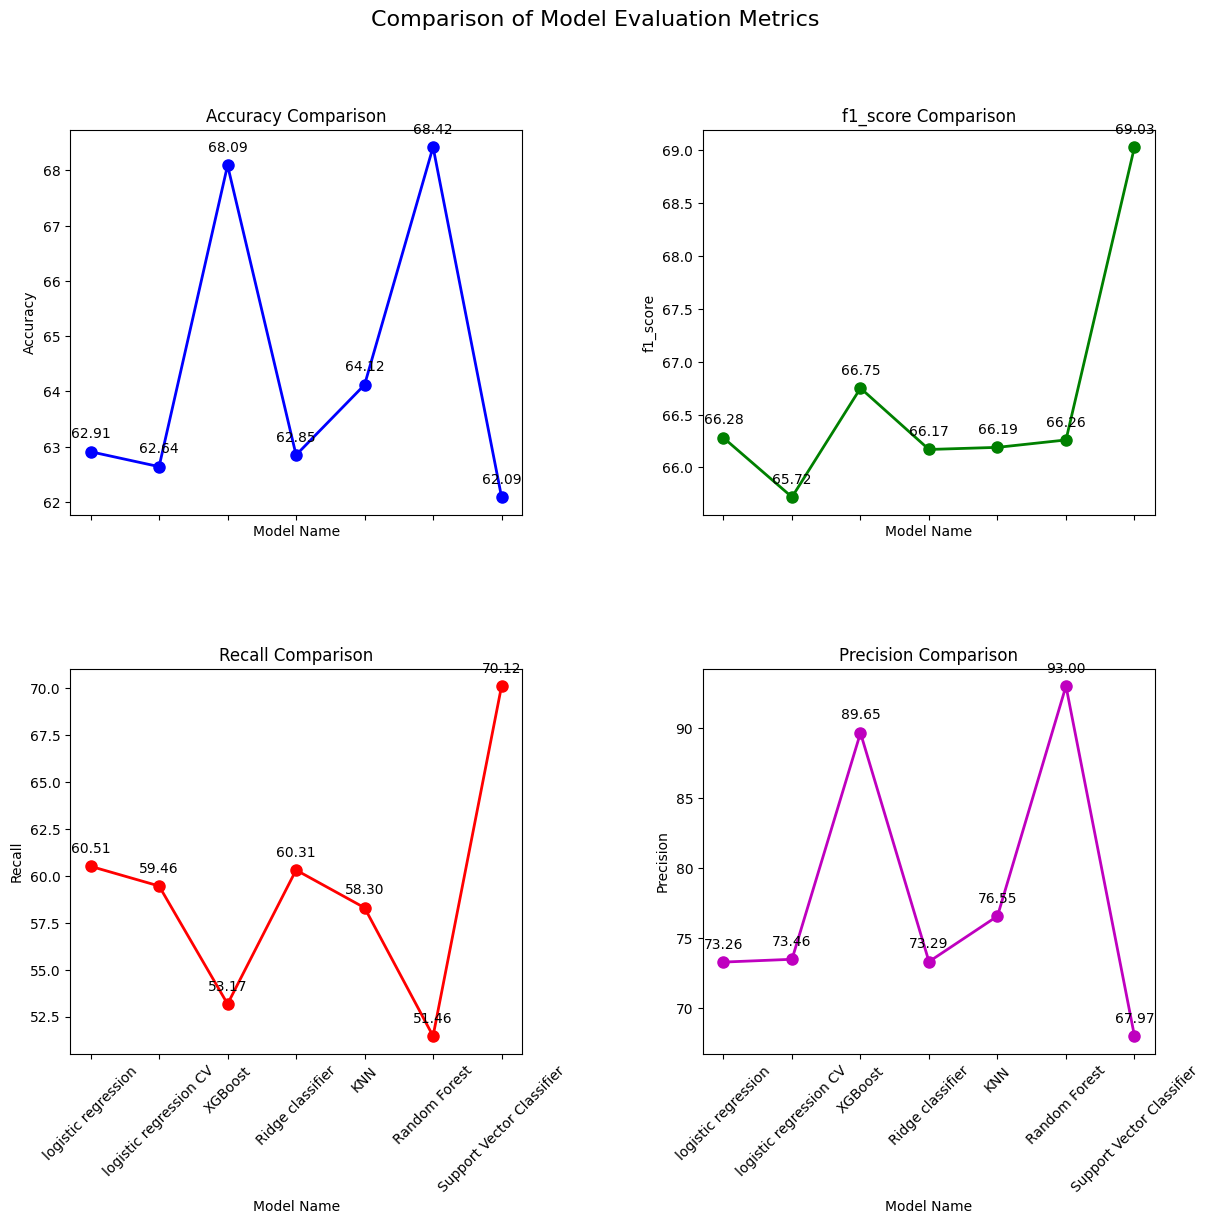

In [68]:
#metrics and colors for each plot
metrics = ['Accuracy', 'f1_score', 'Recall', 'Precision']
colors = ['b', 'g', 'r', 'm']

# Set plot size and style
fig, axs = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    ax.plot(comp_data['Name'], comp_data[metric], marker='o', color=colors[i], linestyle='-', linewidth=2, markersize=8)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Model Name')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    for j in range(len(comp_data)):
        ax.annotate(f'{comp_data[metric][j]:.2f}', (comp_data['Name'][j], comp_data[metric][j]), textcoords="offset points", xytext=(0,10), ha='center')

# Set the main title
fig.suptitle('Comparison of Model Evaluation Metrics', fontsize=16)

# Show the plot
plt.show()


#### Best model is RandomForestClassifier-rf

### Prediction of output using a data sample

In [71]:
# Prepare new data point for prediction
new_data = pd.DataFrame({
    'Warehouse_block': ['A'],
    'Mode_of_Shipment': ['Flight'],
    'Customer_care_calls': [2],
    'Customer_rating': [2],
    'Cost_of_the_Product': [183],
    'Prior_purchases': [4],
    'Product_importance': ['low'],
    'Gender': ['M'],
    'Discount_offered': [48],
    'Weight_in_gms': [3374]
})

# Encode categorical attributes
for col in categorical_attributes:
    new_data[col] = new_data[col].astype('category').cat.codes

# Normalize new data
new_data = norms.transform(new_data)

# Predict using the trained model
prediction = rf.predict(new_data)

# Output prediction result
prediction_text = 'Order will reach on time' if prediction[0] == 1 else 'Order will not reach on time'
print('Prediction for the new data point:', prediction_text)

Prediction for the new data point: Order will reach on time


# Model Deployment

### Saving and loading the Best Model

In [76]:
import pickle

In [77]:
#Model building for best model with hyperparameters
rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, max_features='sqrt', n_estimators=200, min_samples_split=2, random_state=1000)
rf.fit(x_train, y_train)
print('Train Score:', rf.score(x_train, y_train))
print('Test Score:', rf.score(x_test, y_test))

# Save the model and normalizer
with open('rf_acc_68.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)
with open('normalizer.pkl', 'wb') as norm_file:
    pickle.dump(norms, norm_file)


Train Score: 0.7665573770491804
Test Score: 0.6842424242424242
